In [2]:
import pickle
from caiman.base.rois import register_multisession
from caiman.utils import visualization
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from pathlib import Path
import numpy as np

from matplotlib import pyplot as plt
import numpy as np

2023-04-11 10:05:24.470759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
data_path = Path("/ceph/imaging1/davide/2p_data/eq_luminance/")

# SESSION TO PREPROCESS
#sessions = {'441406_fiano':['20230301','20230306']}
sessions = {'441394_ribolla':['20230320','20230321']}


In [11]:
spatial = []
dims = []
templates = []
for animal in sessions.keys():
    for date in sessions[animal]:
        
        cnmf = load_CNMF(data_path.joinpath(f'{animal}/{date}/cnmf.hdf5'))
        with open(data_path.joinpath(f'{animal}/{date}/metrics.pickle'),'rb') as pfile:
            metrics = pickle.load(pfile)
        spatial.append(cnmf.estimates.A[:,cnmf.estimates.idx_components])
        dims.append(cnmf.dims)
        templates.append(np.asarray(metrics['corr_image']))


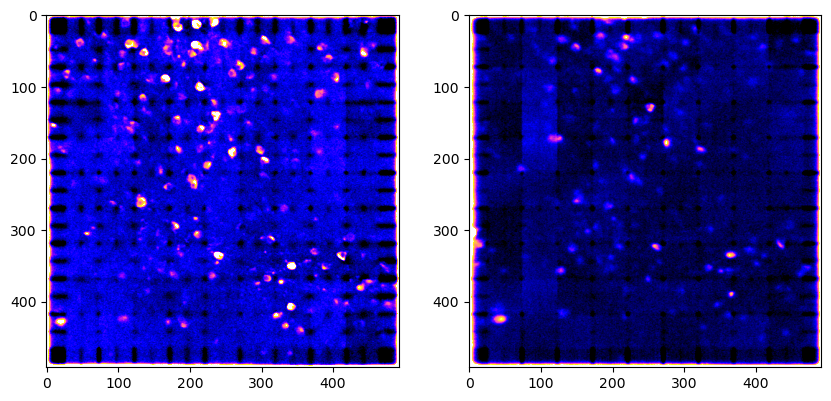

In [12]:
plt.figure(figsize=(10,5))
for i,t in enumerate(templates):
    plt.subplot(1,len(templates),i+1)
    plt.imshow(t,vmin=np.percentile(t.ravel(),3),vmax=np.percentile(t.ravel(),97),cmap=plt.cm.gnuplot2)

In [14]:
spatial_union, assignments, matchings = register_multisession(A=spatial, dims=dims[0], templates=templates)

/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [49]:
disjoint_union = spatial[0].shape[1]+spatial[1].shape[1]
n_matched = disjoint_union-spatial_union.shape[1]
max_matchable = min(spatial[0].shape[1],spatial[1].shape[1])
print(f'Disjoint union: {disjoint_union}')
print(f'Spatial union:{spatial_union.shape[1]}')
print(f'Number matched:{n_matched}')
print(f'Fraction matched: {n_matched/max_matchable}')

Disjoint union: 503
Spatial union:457
Number matched:46
Fraction matched: 0.184


# Pairwise matching distirbution

In [22]:
data_path = Path("/ceph/imaging1/davide/2p_data/eq_luminance/")
sessions = {'441406_fiano':['20230301','20230306','20230307','20230308','20230309','20230315','20230316','20230317','20230320','20230321'],
            '441394_ribolla':['20230301','20230306','20230307','20230308','20230309','20230315','20230316','20230317','20230320','20230321']
           }



250

In [23]:
animal = 

253

In [29]:
spatial_union.shape

(242064, 457)

In [41]:
np.sum(np.logical_not(np.isnan(assignments[:,1])).astype(int))

253

In [42]:
len(assignments)

457